In [3]:
import keras

In [11]:
import tensorflow as tf

In [6]:
from tensorflow.keras.applications.vgg19 import VGG19

In [7]:
import pathlib

In [283]:
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time

from tensorflow.keras import datasets, layers, models

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 224
SHUFFLE_SIZE = 1000

In [400]:
data_root = pathlib.Path("./datasets")

In [401]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

2000

In [402]:
all_image_paths

['datasets/cat/cat_193.jpg',
 'datasets/dog/dog_368.jpg',
 'datasets/snake/snake_484.jpg',
 'datasets/snake/snake_228.jpg',
 'datasets/snake/snake_434.jpg',
 'datasets/snake/snake_55.jpg',
 'datasets/lizard/lizard_163.jpg',
 'datasets/snake/snake_91.jpg',
 'datasets/lizard/lizard_126.jpg',
 'datasets/snake/snake_215.jpg',
 'datasets/lizard/lizard_81.jpg',
 'datasets/lizard/lizard_354.jpg',
 'datasets/lizard/lizard_9.jpg',
 'datasets/snake/snake_459.jpg',
 'datasets/lizard/lizard_99.jpg',
 'datasets/cat/cat_359.jpg',
 'datasets/cat/cat_411.jpg',
 'datasets/snake/snake_492.jpg',
 'datasets/cat/cat_244.jpg',
 'datasets/lizard/lizard_188.jpg',
 'datasets/cat/cat_283.jpg',
 'datasets/dog/dog_186.jpg',
 'datasets/snake/snake_486.jpg',
 'datasets/snake/snake_206.jpg',
 'datasets/dog/dog_123.jpg',
 'datasets/snake/snake_487.jpg',
 'datasets/lizard/lizard_282.jpg',
 'datasets/snake/snake_343.jpg',
 'datasets/snake/snake_347.jpg',
 'datasets/snake/snake_127.jpg',
 'datasets/dog/dog_79.jpg',
 'da

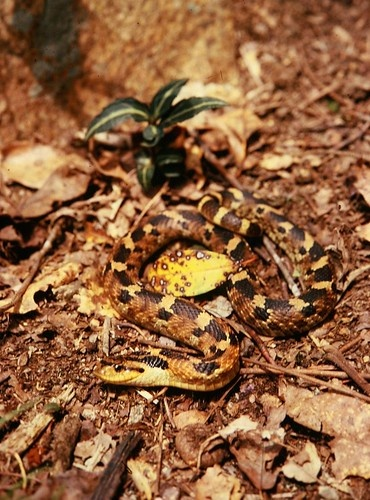

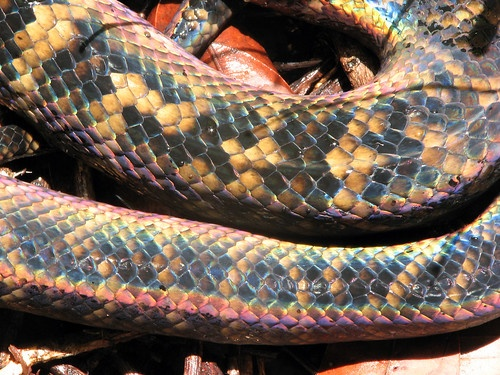

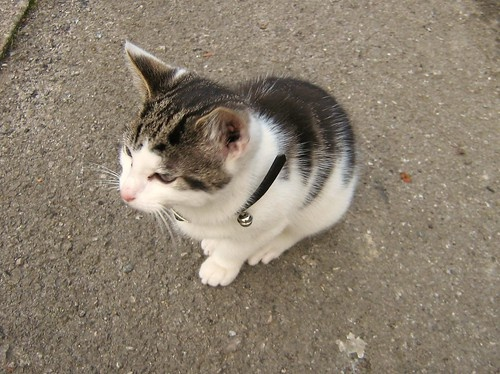

In [403]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print()

In [414]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['cat', 'dog', 'lizard', 'snake']

In [415]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'cat': 0, 'dog': 1, 'lizard': 2, 'snake': 3}

In [416]:
index_to_label = dict((index, name) for index, name in enumerate(label_names))
index_to_label

{0: 'cat', 1: 'dog', 2: 'lizard', 3: 'snake'}

In [417]:
all_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_labels[:10])

First 10 labels indices:  [0, 1, 3, 3, 3, 3, 2, 3, 2, 3]


In [418]:
from sklearn.model_selection import train_test_split
#just using this to randomize 
train_paths, test_paths, train_labels, test_labels = train_test_split(all_image_paths, all_labels, test_size=0.0001)  

357
dog


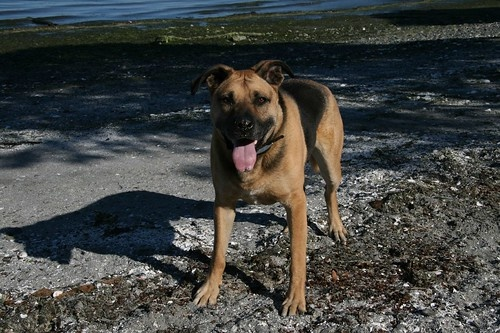


1986
lizard


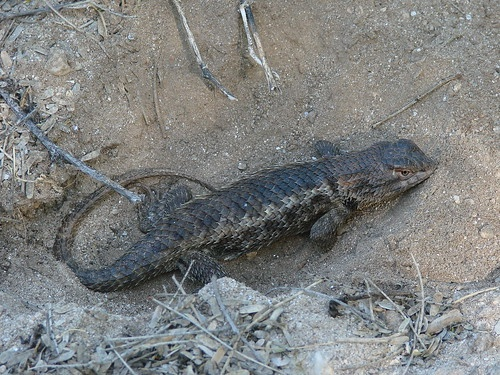


1347
dog


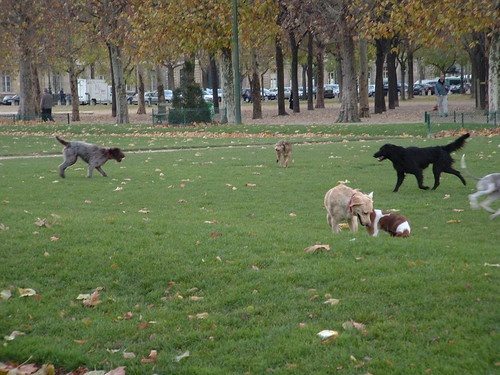

In [419]:
for n in range(3):
    i = random.randint(0,len(train_paths))
    print(i)
    image_path = train_paths[i]
    print(label_names[train_labels[i]])
    display.display(display.Image(image_path))
    print()

In [420]:
img_raw = tf.io.read_file(train_paths[0])
print(repr(img_raw)[:100]+"...")

img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...
(391, 499, 3)
<dtype: 'uint8'>


In [421]:
img_final = tf.image.resize(img_tensor, [IMG_SIZE, IMG_SIZE])
img_final = img_final / 255.0 # normalize pixel values
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(224, 224, 3)
0.0
1.0


In [422]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input
image = preprocess_input(image)
def load_and_preprocess_image(path):
    img = load_img(path, target_size=(224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    return img
def show(img, label):
    plt.imshow(img)
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    print()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


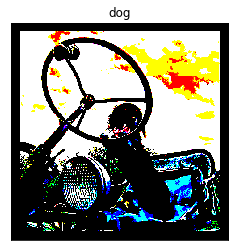

In [423]:
img_path = train_paths[1]
img = load_and_preprocess_image(img_path)
label = label_names[train_labels[1]]
show(img, label)


In [424]:
base_model = tf.keras.applications.VGG19(weights='imagenet',
                                              input_shape=(IMG_SIZE,IMG_SIZE,3))
base_model.trainable=False

In [425]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [426]:
model = tf.keras.Sequential()

In [427]:
for layer in base_model.layers[:-1]: # just exclude last layer from copying
    model.add(layer)
for layer in model.layers:
    layer.trainable = False


In [428]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [429]:
result = []
for i in range(len(train_paths)):
    if i%100==0:
        print("{}th image processed".format(i))

    img = load_and_preprocess_image(train_paths[i])
    label = train_labels[i]
    output = model.predict(tf.expand_dims(img, axis=0))
    result.append([output,label])

0th image processed
100th image processed
200th image processed
300th image processed
400th image processed
500th image processed
600th image processed
700th image processed
800th image processed
900th image processed
1000th image processed
1100th image processed
1200th image processed
1300th image processed
1400th image processed
1500th image processed
1600th image processed
1700th image processed
1800th image processed
1900th image processed


In [430]:
arr_result = np.array(result)

In [431]:
arr_result[0:,1]

array([3, 1, 2, ..., 1, 1, 3], dtype=object)

In [432]:
from sklearn.decomposition import PCA

In [433]:
pca = PCA(n_components=2)

In [434]:
concat_result = np.concatenate(np.array(arr_result[:,0]), axis=0)

In [435]:
concat_result.shape

(1999, 4096)

In [436]:
pca.fit(concat_result)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [437]:
class_0 = np.concatenate(arr_result[arr_result[:,1]==0][:,0], axis=0)
class_1 = np.concatenate(arr_result[arr_result[:,1]==1][:,0], axis=0)
class_2 = np.concatenate(arr_result[arr_result[:,1]==2][:,0], axis=0)
class_3 = np.concatenate(arr_result[arr_result[:,1]==3][:,0], axis=0)

In [438]:
pca_class_0 = pca.transform(class_0)
pca_class_1 = pca.transform(class_1)
pca_class_2 = pca.transform(class_2)
pca_class_3 = pca.transform(class_3)

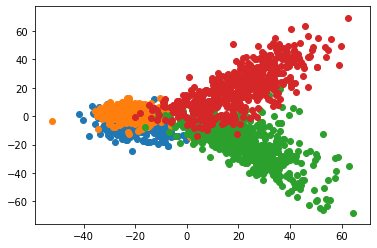

In [439]:
plt.scatter(pca_class_0[:,0],pca_class_0[:,1])
plt.scatter(pca_class_1[:,0],pca_class_1[:,1])
plt.scatter(pca_class_2[:,0],pca_class_2[:,1])
plt.scatter(pca_class_3[:,0],pca_class_3[:,1])

plt.show()

In [440]:
pca_out = pca.fit_transform(concat_result)

Iteration 10: error is 22.177264
Iteration 20: error is 22.197827
Iteration 30: error is 22.184130
Iteration 40: error is 22.137395
Iteration 50: error is 22.049094
Iteration 60: error is 21.904401
Iteration 70: error is 21.692654
Iteration 80: error is 21.421528
Iteration 90: error is 21.119856
Iteration 100: error is 20.820291
Iteration 110: error is 20.542774
Iteration 120: error is 20.293782
Iteration 130: error is 20.072517
Iteration 140: error is 19.875608
Iteration 150: error is 19.699304
Iteration 160: error is 19.540247
Iteration 170: error is 19.395650
Iteration 180: error is 19.263301
Iteration 190: error is 19.141484
Iteration 200: error is 19.028882
Iteration 210: error is 18.924462
Iteration 220: error is 18.827384
Iteration 230: error is 18.736922
Iteration 240: error is 18.652418
Iteration 250: error is 18.573246
Iteration 260: error is 18.498802
Iteration 270: error is 18.428493
Iteration 280: error is 18.361747
Iteration 290: error is 18.298026
Iteration 300: error is

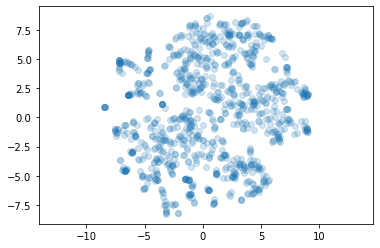

In [464]:
import math
import numpy as np
import pandas as pd
from sklearn import datasets, decomposition, metrics
from matplotlib import pyplot as plt
import copy
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, './tsne')
from hierarchy import dist, merge, calc_partitions


############# CONSTANTS ##############

DATA_SIZE = 1000
ITERATIONS = 2000

######################################


############## METHODS ###############

def perplex_helper(Di, sigma):
    Pi = np.exp(-1*Di.copy() * sigma)
    Psum = np.sum(Pi)
    perp_calc = np.log(Psum) + sigma * np.sum(Di * Pi) / Psum
    Pf = Pi/Psum
    return Pf, perp_calc

#NEED TO OPTIMIZE FROM O(n^2)
def calc_p_vals(X, tol = 1e-5, perplexity = 30.0):
    (n, d) = X.shape

    partitions, pdist = calc_partitions(X, dist)
    pdists = pdist[0]

    P = np.zeros((n, n))
    sigmas = np.ones((n,1))

    for i in range(n):
        Di = pdists[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        Pf, perp_calc = perplex_helper(Di, sigmas[i])
        #perplexity calculation - binary search for best param
        min_ = -np.inf
        max_ = np.inf
        count = 0
        diff = perp_calc - np.log(perplexity)
        while diff > tol and count < 50:
            if diff > 0:
                min_ = sigmas[i].copy()
                if max_ == np.inf or max_ == -np.inf:
                    sigmas[i] = sigmas[i] * 2.
                else:
                    sigmas[i] = (sigmas[i] + max_) / 2.
            else:
                max_ = sigmas[i].copy()
                if min_ == np.inf or min_ == -np.inf:
                    sigmas[i] = sigmas[i] / 2.
                else:
                    sigmas[i] = (sigmas[i] + min_) / 2.
            count+=1
            Pf, perp_calc = perplex_helper(Di, sigmas[i])
            diff = perp_calc - np.log(perplexity)

        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = Pf
    return P

######################################################

###################### MAIN #########################

if __name__ == '__main__':
    
    random_state = 1000
    df = concat_result[0:1000]
    labels = np.array(arr_result[0:1000,1]).astype('int32')
    x_init = np.mat(df)

    np.random.seed(random_state)

    # desired_classes = [0,1,2,3,4]
    # x_init, labels = datasets.make_blobs(n_samples=DATA_SIZE,n_features=100, centers=5, cluster_std = 1)
    y = np.random.rand(DATA_SIZE, 2)



    #PCA and normalize into ball of radius 1
    x = decomposition.PCA(n_components=30).fit_transform(x_init)
    x = x/np.var(np.linalg.norm(x, axis=1))

    (n,d) = x.shape

    pvals = calc_p_vals(x)
    pvals = pvals + pvals.T       # calculate symmetric pvals
    pvals = pvals / np.sum(pvals)

    #early exaggeration
    pvals = pvals * 4.
    pvals = np.maximum(pvals, 1e-12)

    #gradient descent params
    dy = np.zeros((n,2))
    lr = 50

    # params for van der maaten's momentum magic!
    prev_y = np.zeros((n,2))
    init_momentum = 0.5
    st_momentum = 0.8
    gains = np.ones((n, 2))
    min_gain = 0.01
    eta = 500


    for iter in range(ITERATIONS):

        #compute qvals -> computation trick from van der maaten's code
        sum_Y = np.sum(np.square(y), 1)
        num = -2. * np.dot(y, y.T)                              #-> OPTIMIZE THIS OVER PARTITION SLICES
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        qvals = num / np.sum(num)
        qvals = np.maximum(qvals, 1e-12)

        #compute gradient -> computation trick again stolen from van der maaten
        PQ = pvals - qvals
        for i in range(n):
            dy[i,:] = np.sum(np.tile(PQ[:, i] * num[:, i], (2, 1)).T * (y[i, :] - y), 0)

        # van der maaten's momentum magic
        # if iter < 20:
        #     momentum = init_momentum
        # else:
        #     momentum = st_momentum
        # gains = (gains + 0.2) * ((dy > 0.) != (iy > 0.)) + \
        #         (gains * 0.8) * ((dy > 0.) == (iy > 0.))
        # gains[gains < min_gain] = min_gain
        # iy = momentum * iy - eta * (gains * dy)
        # y = y + iy
        # y = y - np.tile(np.mean(y, 0), (n, 1))

        #our shitty gd implementation
        y = y-lr*dy

        #print loss value
        if (iter + 1) % 10 == 0:
            L = np.sum(pvals * np.log(pvals / qvals))  #KL divergence
            print("Iteration %d: error is %f" % (iter + 1, L))

        #stop early exaggeration
        if iter == 300:
            pvals = pvals/4

    try:
        np.save('htsne_data.csv', y)
        np.save('htsne_labels.csv', labels)
        plt.figure()
        base = {}
        for class_ in desired_classes:
            base[class_] = []
        _dict = copy.deepcopy(base)
        for i,row in enumerate(y):
            _dict[labels[i]].append(row)
        for i in _dict.keys():
            plt.scatter(np.array(_dict[i])[:,0], np.array(_dict[i])[:,1], alpha=0.6)
        plt.legend(desired_classes)
    except Exception as e:
        print(e)
        plt.scatter(y[:,0], y[:,1], alpha=0.2)
    plt.axis('equal')
    plt.show()

#####################################################


In [470]:
res = np.load('htsne_data.csv.npy')
labels = np.load('htsne_labels.csv.npy').astype('int32')

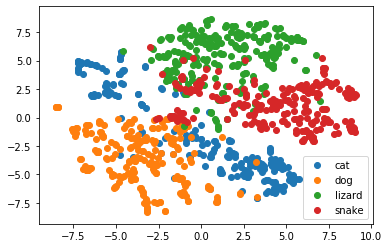

In [475]:
plt.scatter(res[labels==0,0],res[labels==0,1], label = index_to_label[0])
plt.scatter(res[labels==1,0],res[labels==1,1], label = index_to_label[1])
plt.scatter(res[labels==2,0],res[labels==2,1], label = index_to_label[2])
plt.scatter(res[labels==3,0],res[labels==3,1], label = index_to_label[3])
plt.legend()
plt.show()

In [442]:
from sklearn.tree import DecisionTreeClassifier

In [443]:
from keras.applications.vgg16 import decode_predictions


In [451]:
concat_result.shape

(1999, 4096)

In [390]:
decode_predictions(base_model.predict(tf.expand_dims(img,axis=0)))

[[('n01729977', 'green_snake', 0.5705456),
  ('n01749939', 'green_mamba', 0.32611334),
  ('n01739381', 'vine_snake', 0.056034993),
  ('n01693334', 'green_lizard', 0.011974493),
  ('n01740131', 'night_snake', 0.011501807)]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


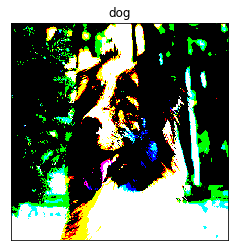

In [387]:
show(img,"dog")

In [444]:
tree = DecisionTreeClassifier(max_depth=20)

In [445]:
tree.fit(concat_result[:1800], arr_result[0:1800,1].astype('int32'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [446]:
sum(tree.predict(concat_result[1800:]) == arr_result[1800:,1].astype('int32'))/200

0.87

In [453]:
tree.get_depth()

14

In [483]:
np.save("cnn_postprocessed.csv", concat_result)

In [488]:
np.save("cnn_labels.csv", arr_result[:,1].astype('int32'))

In [489]:
labels.shape

(1000,)